In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge

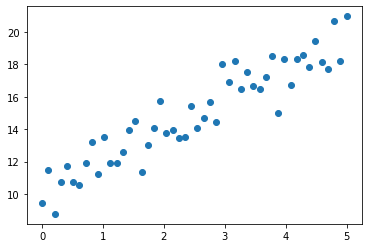

In [15]:
x = np.linspace(0, 5)
e = np.random.normal(size=(x.size,))
y = (2 * x) + e + 10
plt.plot(x, y, 'o')
plt.show()

In [16]:
a = 1
reg = Ridge(alpha=a)
reg.fit(x.reshape(-1, 1), y)
yhat = reg.predict(x.reshape(-1,1))

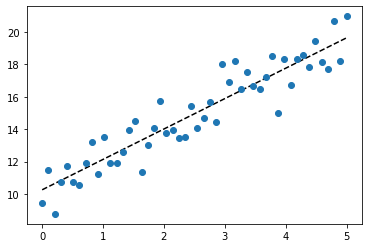

In [17]:
plt.plot(x, yhat, 'k--')
plt.plot(x, y, 'o')
plt.show()

(1,)


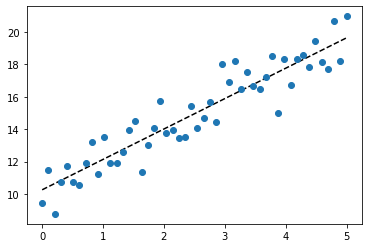

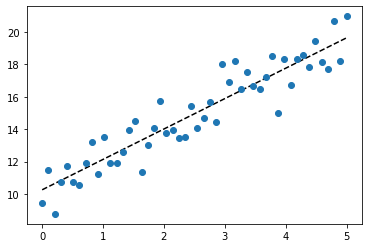

In [28]:
w = reg.coef_
b = reg.intercept_
theta = np.array([b, w[0]]).reshape(2,1)
x_aug = np.concatenate([np.ones(shape=(x.size,1)), x.reshape(-1, 1)], axis=1)
print(w.shape)
plt.plot(x, (x * w) + b, 'k--')
plt.plot(x, y, 'o')
plt.show()

plt.plot(x, np.matmul(x_aug, theta), 'k--')
plt.plot(x, y, 'o')
plt.show()

In [42]:
reg = Ridge(alpha=a)
reg.fit(x_aug, y)
yhat = reg.predict(x_aug)
w = reg.coef_.reshape(2,1)
b = reg.intercept_
print(w.shape)

(2, 1)


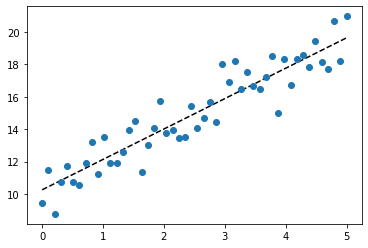

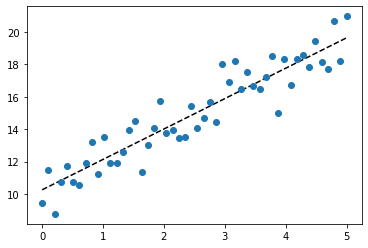

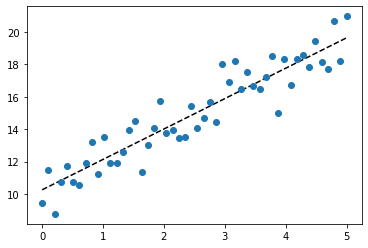

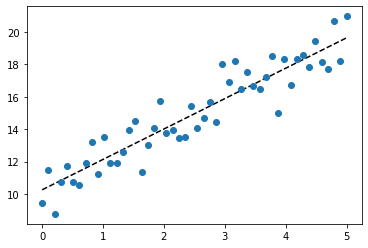

In [48]:
plt.plot(x, yhat, 'k--')
plt.plot(x, y, 'o')
plt.show()

plt.plot(x, np.matmul(x_aug, w) + b, 'k--')
plt.plot(x, y, 'o')
plt.show()

theta_frank = np.array([b, w[-1,0]]).reshape(2,1)

plt.plot(x, np.matmul(x_aug, w) + b, 'k--')
plt.plot(x, y, 'o')
plt.show()

plt.plot(x, np.matmul(x_aug, theta_frank), 'k--')
plt.plot(x, y, 'o')
plt.show()


In [21]:
idx = np.array([True, True, False, False, True])
np.where(idx)[0]

array([0, 1, 4])